In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/dataset_joined.csv")
df.head(5)

,Unnamed: 0,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,...,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,barrio_completo,poblacion_por_barrio
0,0,2019-06-14,09:09:00,27,Mujer,Constitucion,A,A,A,B,...,B,C,C,B,C,B,C,C,Constitucion,44107
1,1,2019-06-13,23:20:00,17,Mujer,Otro,A,B,B,B,...,C,C,B,B,C,B,C,C,Coghlan,18604
2,2,2019-06-13,16:33:00,15,Mujer,Recoleta,B,B,C,B,...,B,B,A,A,A,A,A,A,Recoleta,157932
3,3,2019-06-13,16:10:00,20,Mujer,Barracas,B,C,C,C,...,C,C,C,C,C,B,C,C,Barracas,89452
4,4,2019-06-13,14:29:00,39,Hombre,Almagro,B,C,B,B,...,C,B,C,B,C,C,B,C,Almagro,131699


In [9]:
df_columnas = df[["fecha",'edad', 'genero', 'barrio','barrio_completo',
       'poblacion_por_barrio']]

### Visualizamos los nulos

In [10]:
from IPython.display import Markdown, display

nulls_by_column = df_columnas.isnull().sum()
dataset_size = df.shape[0]

for column in nulls_by_column.index:
    column_nulls = nulls_by_column[column]
    null_percentage = 100 * column_nulls / dataset_size
    display(Markdown(f"* ```{column}``` tiene {column_nulls} nulos, lo cual representa el {null_percentage:.2f}%"))

* ```fecha``` tiene 0 nulos, lo cual representa el 0.00%

* ```edad``` tiene 0 nulos, lo cual representa el 0.00%

* ```genero``` tiene 0 nulos, lo cual representa el 0.00%

* ```barrio``` tiene 0 nulos, lo cual representa el 0.00%

* ```barrio_completo``` tiene 0 nulos, lo cual representa el 0.00%

* ```poblacion_por_barrio``` tiene 0 nulos, lo cual representa el 0.00%

### Visualizamos columna EDAD

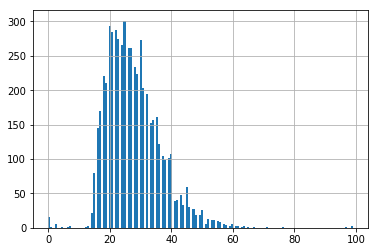

In [11]:
df.edad.hist(bins=150);

###  Podemos escribir en el plot



In [37]:
#plt.hist(df.edad, bins=150);
#plt.annotate('¿Qué hacemos con esto?', xy=(15, 50), xytext=(2.5, 300),
            #arrowprops=dict(facecolor='black', shrink=15), fontsize=16)

#plt.annotate('y esto', xy=(12.5, 600), xytext=(16, 500),
            #arrowprops=dict(facecolor='black', shrink=15), fontsize=16
            #);
#plt.savefig('esto2')

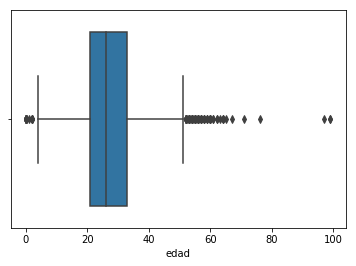

In [13]:
sns.boxplot(df.edad)

### Quitamos los outliers

In [15]:
df_edad = df["edad"]

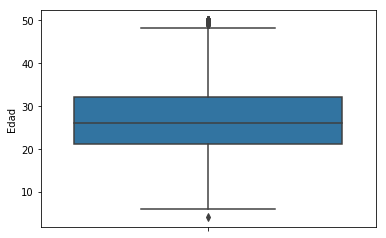

In [16]:
q1 = df_edad.quantile(0.25)
q2 = df_edad.quantile(0.5)
q3 = df_edad.quantile(0.75)

iqr = q3 - q1

up_threshold = q3 + 1.5 * iqr
low_threshold = q1 - 1.5* iqr

no_outliers_mask = (df_edad > low_threshold) & (df_edad < up_threshold)

ax = sns.boxplot(df_edad[no_outliers_mask], orient = 'v').set(
    xlabel='', 
    ylabel='Edad'
)

In [17]:
print(f"El skew es {df_edad[no_outliers_mask].skew()} cuando quitamos los outliers")

El skew es 0.5893768101027447 cuando quitamos los outliers


In [18]:
df_edad[no_outliers_mask].describe()

count    5561.000000
mean       27.400108
std         7.758342
min         4.000000
25%        21.000000
50%        26.000000
75%        32.000000
max        50.000000
Name: edad, dtype: float64

In [19]:
n_without_outliers = df_edad[no_outliers_mask].shape[0]
n_including_outliers = df_edad.shape[0]

taken_percentage = 100 * n_without_outliers / n_including_outliers
print(f"""
Sin outliers hemos tomado un {taken_percentage:.2f}% de los datos que teníamos, considerando solamente {n_including_outliers - n_without_outliers} registros como outliers
""")


Sin outliers hemos tomado un 97.97% de los datos que teníamos, considerando solamente 115 registros como outliers



### Trabajamos sobre la columna BARRIO

In [20]:
barrio = df.barrio.value_counts().head(5)

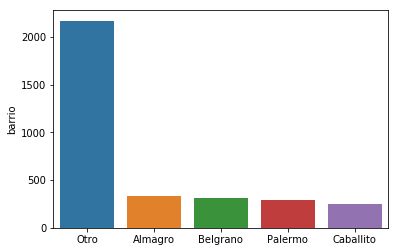

In [21]:
sns.barplot(x=barrio.index, y=barrio)

In [23]:
df.barrio

0       Constitucion
1               Otro
2           Recoleta
3           Barracas
4            Almagro
            ...     
5671       Agronomia
5672    Villa lugano
5673         Almagro
5674         Almagro
5675       Agronomia
Name: barrio, Length: 5676, dtype: object

### Podemos tirar un barplot acá

In [24]:
df["genero"].value_counts()

Mujer     4736
Hombre     912
Otro        28
Name: genero, dtype: int64

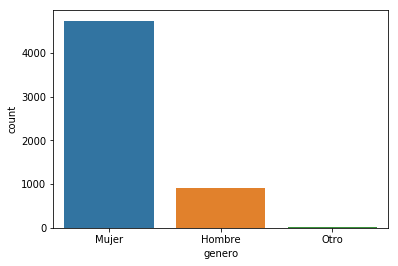

In [25]:
sns.countplot(x='genero', data=df)

In [35]:
df["barrio_completo"]

0       Constitucion
1            Coghlan
2           Recoleta
3           Barracas
4            Almagro
            ...     
5671       Agronomia
5672    Villa lugano
5673         Almagro
5674         Almagro
5675       Agronomia
Name: barrio_completo, Length: 5676, dtype: object

In [28]:
df_columnas = df[['fecha', 'edad', 'genero', 'barrio', 'barrio_completo',
       'poblacion_por_barrio']]

## Ploteamos cantidad de participantes de encuesta por barrio

In [52]:
porbarrio = df.barrio_completo.value_counts()
#porbarrio = barioss.rename_axis('BARRIO').reset_index(name='counts')
porbarrio.head(5)

Almagro      371
Belgrano     365
Palermo      342
Caballito    296
Agronomia    273
Name: barrio_completo, dtype: int64

In [55]:
porbarrio = porbarrio.to_frame().reset_index()

In [57]:
#porbarrio.to_csv('dfencuestadosporbarrio', index = False)